In [2]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import psyneulink as pnl


# Lab 6: Stroop, Response Conflict, & Cognitive Control 

Pat your head and rub your belly at the same time.  Unless you have practiced this odd exercise you will get conflict between the motor commands and quickly end up rubbing your head while also rubbing your belly, OR patting your belly while also patting your head.  As a more difficult exercise, while sitting, lift your right foot and repeatedly rotate it clockwise while simultaneously tracing a counterclockwise circle in the air with your right hand.  Contrast the difficulty of this task with a contralateral attempt, using your left foot and right hand (or right hand and left foot).  Discuss with your labmates and instructor.   Action is an obvious bottleneck -- if you see a threat and try to both "flight" and "fight" at the very same time, the results will look funny and be ineffective.  Some of our cognitive capacity limitations could be byproducts of the need to select singular coherent plans of action.  In this lab we will begin thinking about how multiple psychological processes combine and interact, and how to model what happens when signals and processing conflict.  A classic example is the Stroop task.           

## Participate in Stroop Task

Go to [TeLLab](http://lab.tellab.org/ "TeLLab"), sign in or sign up (free, no spam, <1 minute).  At the top, click "Experiments", then choose Stroop Test.  The first blue box says "Word Color Stroop, TeLLab Team" and you should click the chain-link icon at the bottom left, and then participate in the experiment (<4 minutes). 

After participating, discuss with your labmates and lab instructor.  What about the task is similar to patting your head and rubbing your belly, and what is different?  The task you participated in is a very poor experimental design with inadequate controls and no counterbalancing (but you still experience the effect of conflict, which is the main purpose) -- discuss how you would improve this experiment design.  

---
### Lab Exercise 1: Better Design
List 3 ways that you could improve upon the Stroop task that you participated in on TeLLab, and explain how these design changes are improvements. 

---


## Attention, Automaticity, & Control 

Each of your eyes has about 120 million light-sensitive receptors on the retina, receiving input around 10 times per second.  Between your two eyes and all your other sensory receptors (smell, taste, touch, sound), you are receiving many billions of units of stimulation every second.  Not all of this information makes it into your brain -- for example, before information exits your eye it has already been processed and compressed down to the firing output of 10 million retinal ganglion cells.  Still this is a torrent of information, and you can only be consciously aware and act upon a tiny fraction of all the incoming signals.  Attention is a collection of processing mechanisms that work together to filter, prioritize, and selectively process a relevant subset of the incoming information.   

Psychologists and neuroscientists have extensively documented the capacity limits of human cognition, but we do not yet fully understand all the sources of capacity limits.  Change detection tasks ("spot the difference" between two images) and multiple object tracking tasks (keep track of one or multiple moving targets among moving distractors) demonstrate severely limited awareness (e.g. around 1 object identity, and 3-4 object locations).  Building models can help us understand these limits.     

Cognitive processes that do not require the limited resources of attention can operate automatically.  Training over time can sometimes transfer an effortful and attention-demanding task to become automatic.  For literate and educated people, reading is one of the most highly trained activities that we perform, and it becomes automatic.  The Stroop task pits the automaticity of reading against the somewhat less trained task of naming colors.   

## 3 Models

This notebook contains 3 Stroop Models.  

The first model has fixed weights that reproduce human performance on the task -- for the color naming task it produces interference when the word is different than the ink color (incongruent trials) compared to when the word and color are the same (congruent trials) or there is no word (control trials) -- for the word reading task ink color is largely irrelevant and barely influences performance.  We gain a thorough understanding of the model by running it with a variety of inputs and conditions that correspond to a human participating in a Stroop experiment.

The second model uses learning between the hidden layer and output layer to discover weights that reproduce human performance.  Different training sets will produce different performance -- generalizing to model performance of children first learning to read, or the learning trajectory for novel stimuli in tasks analagous to the original Stroop task.      


The third model explores an alternative account of interference, known as the horse race model.  One candidate explanation for performance on the Stroop task is that Word Reading and Color Naming are supported by separate processes racing for control of response output.  In this account, life experience has trained Word Reading much more than Color Naming, boosting its speed.  This horse race theory was tested on people by splitting the color and word into separate stimuli (e.g. a patch of red color, and the word "green" written in black ink), and presenting these stimuli asyncronously -- for example show the patch of color first to let its process get a head start in the race and then add the word next to the color patch.   



## Modeling Stroop Interference

XXXX  Currently editing XXXX 

why would you process WR more than CN, building up overtime makes things automatic (driving, very consiocus / deliberate, then more reflexive)
all of our experience reading words overcomes colors 

first, fully trained model, show how it reproduces human behavior 
effects to have them explain: 
more facilitation than interference 
word reading is not affected by ink color but color naming is affected by words
what parts of the model correspond to each of these things?
what is attention doing in this model, what is another real life example of attention working this way? 

ok we gave you a trained model, but researchers arrived at these weights by training the model in a way that they 
hypothesize would correspond to how sub components of this task are learned in real life. 
give them a stimulus and target set and have them execute it, what psychological process is the stimulus set trying to capture? 
after training, check the weights
question from learning: 

create a stimulus set that would produce the opposite pattern, train it, and then show the results 
what would you expect for children who are just learning to read? how would you change the model to account for a child who can't read?(what parameters would you change?)

(4-5 questions)
let's stay the words are turned into captchas how would it impact it, how would you make a model capture that? 
spy detection: see if there is a stroop effect for someone who reads russian 

XXXXXXXX




In [3]:
#  INPUT UNITS

#  colors: ('red', 'green'), words: ('RED','GREEN')
colors_input_layer = pnl.TransferMechanism(size=2,
                                           function=pnl.Linear,
                                           name='COLORS_INPUT')

words_input_layer = pnl.TransferMechanism(size=2,
                                          function=pnl.Linear,
                                          name='WORDS_INPUT')

#   Task layer, tasks: ('name the color', 'read the word')
task_layer = pnl.TransferMechanism(size=2,
                                   function=pnl.Linear,
                                   name='TASK')

#   HIDDEN LAYER UNITS

#   colors_hidden: ('red','green') 
#   Logistic activation function, Gain = 1.0, Bias = -4.0 (in PNL bias is subtracted so enter +4.0 to get negative bias)
#   randomly distributed noise to the net input
#   time averaging = integration_rate = 0.1
unit_noise = 0.005
colors_hidden_layer = pnl.TransferMechanism(size=2,
                                            function=pnl.Logistic(gain=1.0, bias=4.0), #should be able to get same result with offset = -4.0
                                            integrator_mode=True,
                                            noise=pnl.NormalDist(mean=0, standard_dev=unit_noise).function,
                                            integration_rate=0.1,
                                            name='COLORS HIDDEN')
#    words_hidden: ('RED','GREEN')
words_hidden_layer = pnl.TransferMechanism(size=2,
                                           function=pnl.Logistic(gain=1.0, bias=4.0),  
                                           integrator_mode=True,
                                           noise=pnl.NormalDist(mean=0, standard_dev=unit_noise).function,
                                           integration_rate=0.1,
                                           name='WORDS HIDDEN')

#    OUTPUT UNITS 

#   Response layer, provide input to accumulator, responses: ('red', 'green')
#   time averaging = tau = 0.1
#   randomly distributed noise to the net input
response_layer = pnl.TransferMechanism(size=2,
                                       function=pnl.Logistic,
                                       name='RESPONSE',
                                       integrator_mode=True,
                                       noise=pnl.NormalDist(mean=0, standard_dev=unit_noise).function,
                                       integration_rate=0.1)
#   Respond red accumulator
#   alpha = rate of evidence accumlation = 0.1
#   sigma = noise = 0.1
#   noise will be: squareroot(time_step_size * noise) * a random sample from a normal distribution 
accumulator_noise = 0.1
respond_red_accumulator = pnl.IntegratorMechanism(function=pnl.SimpleIntegrator(noise=pnl.NormalDist(mean=0,
                                                                                                     standard_dev=accumulator_noise).function,
                                                                               rate=0.1), 
                                                  name='respond_red_accumulator')
#   Respond green accumulator
respond_green_accumulator = pnl.IntegratorMechanism(function=pnl.SimpleIntegrator(noise=pnl.NormalDist(mean=0,
                                                                                                       standard_dev=accumulator_noise).function,
                                                                               rate=0.1), 
                                                    name='respond_green_accumulator')


In [4]:
#   LOGGING
colors_hidden_layer.set_log_conditions('value')
words_hidden_layer.set_log_conditions('value')
response_layer.set_log_conditions('value')
respond_red_accumulator.set_log_conditions('value')
respond_green_accumulator.set_log_conditions('value')


In [5]:
#   SET UP CONNECTIONS

#   rows correspond to sender 
#   columns correspond to: weighting of the contribution that a given sender makes to the receiver

#   INPUT TO HIDDEN
# row 0: input_'red' to hidden_'red', hidden_'green'
# row 1: input_'green' to hidden_'red', hidden_'green'
color_weights = pnl.MappingProjection(matrix=np.matrix([[2.2, -2.2], 
                                                        [-2.2, 2.2]]), 
                                      name='COLOR_WEIGHTS')
# row 0: input_'RED' to hidden_'RED', hidden_'GREEN'
# row 1: input_'GREEN' to hidden_'RED', hidden_'GREEN'
word_weights = pnl.MappingProjection(matrix=np.matrix([[2.6, -2.6], 
                                                       [-2.6, 2.6]]), 
                                     name='WORD_WEIGHTS')

#   HIDDEN TO RESPONSE
# row 0: hidden_'red' to response_'red', response_'green'
# row 1: hidden_'green' to response_'red', response_'green'
color_response_weights = pnl.MappingProjection(matrix=np.matrix([[1.3, -1.3], 
                                                                 [-1.3, 1.3]]), 
                                               name='COLOR_RESPONSE_WEIGHTS')
# row 0: hidden_'RED' to response_'red', response_'green'
# row 1: hidden_'GREEN' to response_'red', response_'green'
word_response_weights = pnl.MappingProjection(matrix=np.matrix([[2.5, -2.5], 
                                                                [-2.5, 2.5]]), 
                                              name='WORD_RESPONSE_WEIGHTS')

#   TASK TO HIDDEN LAYER
#   row 0: task_CN to hidden_'red', hidden_'green'
#   row 1: task_WR to hidden_'red', hidden_'green'
task_CN_weights = pnl.MappingProjection(matrix=np.matrix([[4.0, 4.0], 
                                                          [0, 0]]), 
                                        name='TASK_CN_WEIGHTS')

#   row 0: task_CN to hidden_'RED', hidden_'GREEN'
#   row 1: task_WR to hidden_'RED', hidden_'GREEN'
task_WR_weights = pnl.MappingProjection(matrix=np.matrix([[0, 0], 
                                                          [4.0, 4.0]]), 
                                        name='TASK_WR_WEIGHTS')

#   RESPONSE UNITS TO ACCUMULATORS 
#   row 0: response_'red' to respond_red_accumulator 
#   row 1: response_'green' to respond_red_accumulator 
respond_red_differencing_weights = pnl.MappingProjection(matrix=np.matrix([[1.0], [-1.0]]), 
                                                         name='RESPOND_RED_WEIGHTS')


#   row 0: response_'red' to respond_green_accumulator
#   row 1: response_'green' to respond_green_accumulator 
respond_green_differencing_weights = pnl.MappingProjection(matrix=np.matrix([[-1.0], [1.0]]), 
                                                           name='RESPOND_GREEN_WEIGHTS')



In [6]:
#   CREATE PATHWAYS
#   Words pathway
words_process = pnl.Process(pathway=[words_input_layer, 
                                     word_weights, 
                                     words_hidden_layer, 
                                     word_response_weights, 
                                     response_layer], name='WORDS_PROCESS')

#   Colors pathway
colors_process = pnl.Process(pathway=[colors_input_layer, 
                                      color_weights, 
                                      colors_hidden_layer, 
                                      color_response_weights, 
                                      response_layer], name='COLORS_PROCESS')

#   Task representation pathway
task_CN_process = pnl.Process(pathway=[task_layer, 
                                       task_CN_weights, 
                                       colors_hidden_layer], 
                              name='TASK_CN_PROCESS')
task_WR_process = pnl.Process(pathway=[task_layer, 
                                       task_WR_weights, 
                                       words_hidden_layer], 
                              name='TASK_WR_PROCESS')


#   Evidence accumulation pathway 
respond_red_process = pnl.Process(pathway=[response_layer,
                                           respond_red_differencing_weights, 
                                           respond_red_accumulator], 
                                  name='RESPOND_RED_PROCESS')
respond_green_process = pnl.Process(pathway=[response_layer,
                                             respond_green_differencing_weights,
                                             respond_green_accumulator], 
                                    name='RESPOND_GREEN_PROCESS')


In [7]:
#   CREATE SYSTEM
my_Stroop = pnl.System(processes=[colors_process, 
                                  words_process, 
                                  task_CN_process, 
                                  task_WR_process, 
                                  respond_red_process,
                                  respond_green_process], 
                       name='FEEDFORWARD_STROOP_SYSTEM')


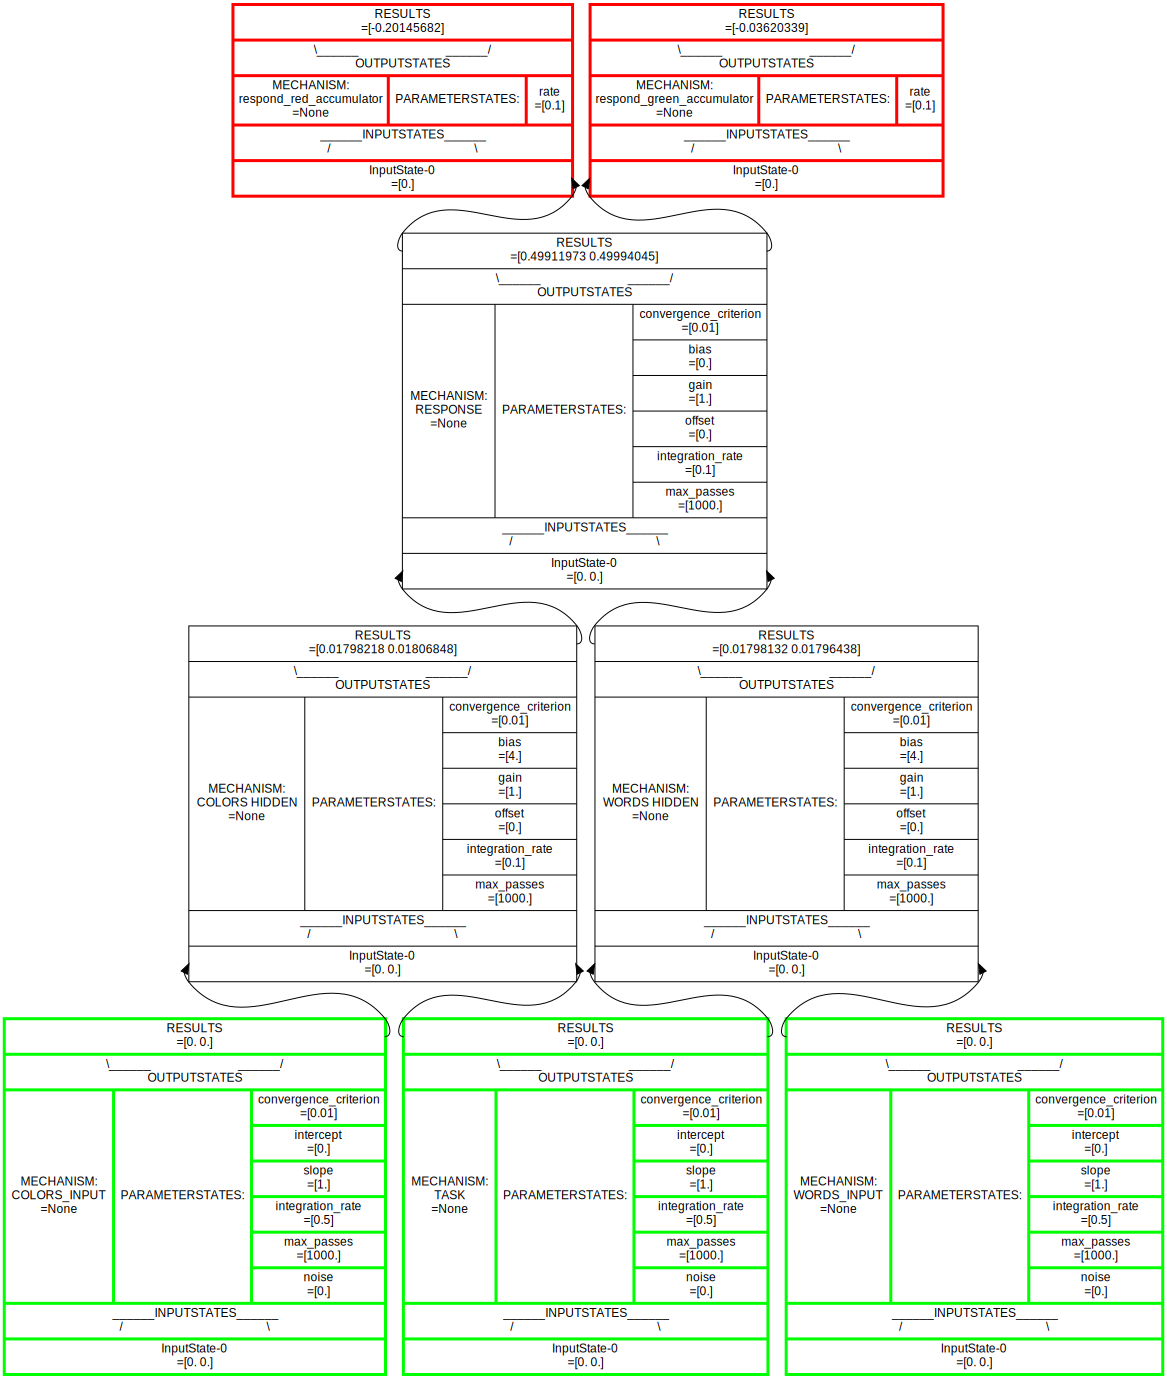

In [8]:
# my_Stroop.show()
my_Stroop.show_graph(show_dimensions=pnl.ALL, output_fmt = 'jupyter')
my_Stroop.show_graph(show_mechanism_structure=pnl.VALUES, output_fmt = 'jupyter')


In [ ]:
# Function to create test trials 
# a RED word input is [1,0] to words_input_layer and GREEN word is [0,1]
# a red color input is [1,0] to colors_input_layer and green color is [0,1]
# a color-naming trial is [1,0] to task_layer and a word-reading trial is [0,1]

def trial_dict(red_color, green_color, red_word, green_word, CN, WR):

    trialdict = {
    colors_input_layer: [red_color, green_color],
    words_input_layer: [red_word, green_word],
    task_layer: [CN, WR]
    }
    return trialdict

# Define initialization trials separately
# input just task and run once so system asymptotes
WR_trial_initialize_input = trial_dict(0, 0, 0, 0, 0, 1)

CN_trial_initialize_input = trial_dict(0, 0, 0, 0, 1, 0)



In [ ]:
#   CREATE THRESHOLD FUNCTION
# first value of DDM's value is DECISION_VARIABLE
def pass_threshold(mech1, mech2, thresh):
    results1 = mech1.output_states[0].value
    results2 = mech2.output_states[0].value
    for val in results1:
        if val >= thresh:
            return True
    for val in results2:
        if val >= thresh:
            return True
    return False
accumulator_threshold = 1.0

terminate_trial = {
    pnl.TimeScale.TRIAL: pnl.While(pass_threshold, respond_red_accumulator, respond_green_accumulator, accumulator_threshold)
}


In [24]:
my_Stroop.run(inputs=trial_dict(0,1,0,0,1,0), termination_processing=terminate_trial)

[[array([1.01207037]), array([-1.57061328])],
 [array([1.01207037]), array([-1.57061328])],
 [array([1.01207037]), array([-1.57061328])],
 [array([1.01207037]), array([-1.57061328])],
 [array([1.01207037]), array([-1.57061328])]]

In [ ]:
#function to test a particular trial type 
def testtrialtype(test_trial_input, initialize_trial_input, ntrials, plot_title, trial_test_counter):
    #create variable to store results 
    results = np.empty((10,0))
    #clear log
    respond_red_accumulator.log.clear_entries(delete_entry=False)
    respond_red_accumulator.reinitialize(0)
    respond_green_accumulator.reinitialize(0)
    for trial in range(ntrials):
        #run system once (with integrator mode off and no noise for hidden units) with only task so asymptotes 
        colors_hidden_layer.integrator_mode = False 
        words_hidden_layer.integrator_mode = False 
        response_layer.integrator_mode = False 
        colors_hidden_layer.noise = 0
        words_hidden_layer.noise = 0
        response_layer.noise = 0
        
        my_Stroop.run(inputs=initialize_trial_input)
        #but didn't want to run accumulators so set those back to zero 
        respond_green_accumulator.reinitialize(0)
        respond_red_accumulator.reinitialize(0)
        
        # now put back in integrator mode and noise 
        colors_hidden_layer.integrator_mode = True 
        words_hidden_layer.integrator_mode = True 
        response_layer.integrator_mode = True
        colors_hidden_layer.noise = pnl.NormalDist(mean=0, standard_dev=unit_noise).function
        words_hidden_layer.noise = pnl.NormalDist(mean=0, standard_dev=unit_noise).function
        response_layer.noise = pnl.NormalDist(mean=0, standard_dev=unit_noise).function
        
        #run system with test pattern
        my_Stroop.run(inputs=test_trial_input, termination_processing=terminate_trial)

        # store results
        my_red_accumulator_results = respond_red_accumulator.log.nparray_dictionary()
        # how many cycles to run? count the length of the log
        num_timesteps = np.asarray(np.size(my_red_accumulator_results['value'])).reshape(1,1)
        #value of parts of the system
        red_activity = np.asarray(respond_red_accumulator.value).reshape(1,1)
        green_activity = np.asarray(respond_green_accumulator.value).reshape(1,1)
        colors_hidden_layer_value = np.asarray(colors_hidden_layer.value).reshape(2,1)
        words_hidden_layer_value = np.asarray(words_hidden_layer.value).reshape(2,1)
        response_layer_value = np.asarray(response_layer.value).reshape(2,1)
        #which response hit threshold first?
        if red_activity > green_activity:
            respond_red = np.array([1]).reshape(1,1)
        else:
            respond_red = np.array([0]).reshape(1,1)
        tmp_results = np.concatenate((num_timesteps,
                                      respond_red,
                                      red_activity,
                                      green_activity,
                                      colors_hidden_layer_value,
                                      words_hidden_layer_value,
                                      response_layer_value), axis=0)
        results = np.append(results,tmp_results, axis=1)

        # after a run we want to reset the activations of the integrating units so we can test many trials and examine the distrubtion of responses 
        words_hidden_layer.reinitialize([0,0])
        colors_hidden_layer.reinitialize([0,0])
        response_layer.reinitialize([0,0])
        #clear log to get num_timesteps for next run
        respond_red_accumulator.log.clear_entries(delete_entry=False)
    
    plt.hist(results[0][np.where(results[1]==1)])
    plt.title('Figure '+str(trial_test_counter)+'A. Red response '+plot_title)
    plt.xlabel("number of cycles")
    plt.ylabel(("frequency of "+str(np.size(np.where(results[1]==1)))+" red responses"))
    plt.show()

    plt.hist(results[0][np.where(results[1]==0)])
    plt.title('Figure '+str(trial_test_counter)+'B. Green response '+plot_title)
    plt.xlabel("number of cycles")
    plt.ylabel(("frequency of "+str(np.size(np.where(results[1]==0)))+" green responses"))
    plt.show()

    #plot response layer activity, hidden layer activity all in one plot
    # bar plot:
    labs = ['red_color_hidden',
            'green_color_hidden',
            'red_word_hidden',
            'green_word_hidden',
            'red_response_layer',
            'green_response_layer']
    mean_unit_activity = [np.mean(results[4]),
         np.mean(results[5]),
         np.mean(results[6]),
         np.mean(results[7]),
         np.mean(results[8]),
         np.mean(results[9])]
    mean_unit_activity_x = np.arange(np.size(mean_unit_activity))

    plt.bar(mean_unit_activity_x, mean_unit_activity)
    plt.xticks(mean_unit_activity_x, labs, rotation=15)
    plt.tick_params(axis='x', labelsize=9)
    plt.title('Figure '+str(trial_test_counter)+'C. Mean Unit Activity ' + plot_title)
    plt.show()

    return results



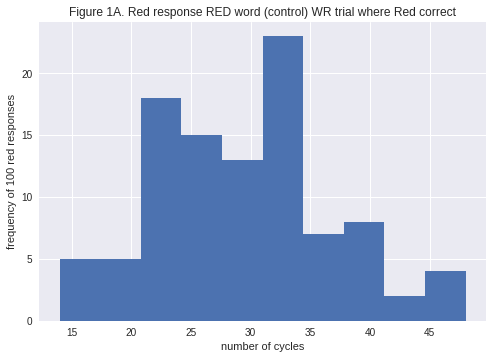

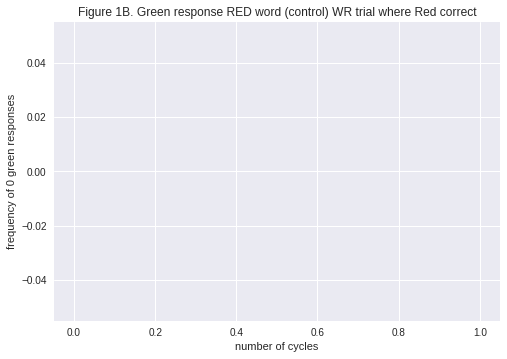

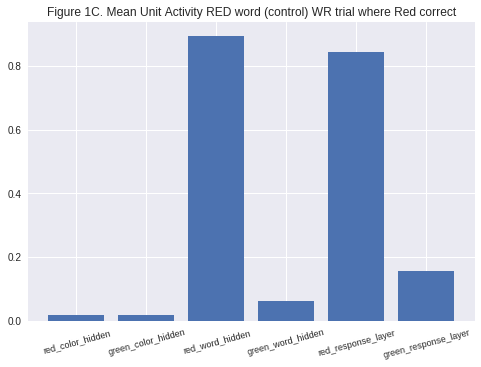

In [11]:
# #numerically label figures 
trial_test_counter = 1
#test WR control trial
ntrials = 100
WR_control_trial_title = 'RED word (control) WR trial where Red correct'
WR_control_trial_input = trial_dict(0, 0, 1, 0, 0, 1) #red_color, green color, red_word, green word, CN, WR
results_WR_control_trial = testtrialtype(WR_control_trial_input, 
                                         WR_trial_initialize_input, 
                                         ntrials, 
                                         WR_control_trial_title,
                                         trial_test_counter)

#test WR congruent trial (should have the least cycles)
# trial_test_counter = trial_test_counter + 1
# ntrials = 100
# WR_congruent_trial_title = 'congruent WR trial where Red correct'
# WR_congruent_trial_input = trial_dict(1, 0, 1, 0, 0, 1) #red_color, green color, red_word, green word, CN, WR
# results_WR_congruent_trial = testtrialtype(WR_congruent_trial_input, 
#                                            WR_trial_initialize_input, 
#                                            ntrials, 
#                                            WR_congruent_trial_title,
#                                            trial_test_counter)

#test WR incongruent trial, should see that color doesn't affect word (same number of cycles as WR control)
# trial_test_counter = trial_test_counter + 1
# ntrials = 100
# WR_incongruent_trial_title = 'incongruent WR trial where Red correct'
# WR_incongruent_trial_input = trial_dict(0, 1, 1, 0, 0, 1) #red_color, green color, red_word, green word, CN, WR
# results_WR_incongruent_trial = testtrialtype(WR_incongruent_trial_input, 
#                                              WR_trial_initialize_input, 
#                                              ntrials, 
#                                              WR_incongruent_trial_title,
#                                              trial_test_counter)


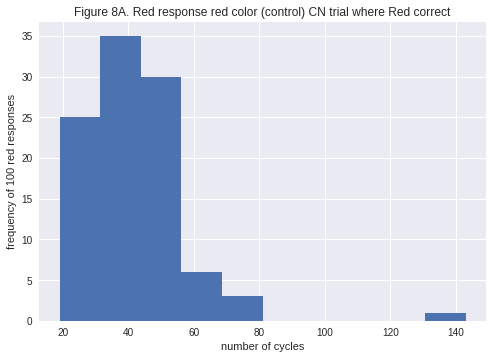

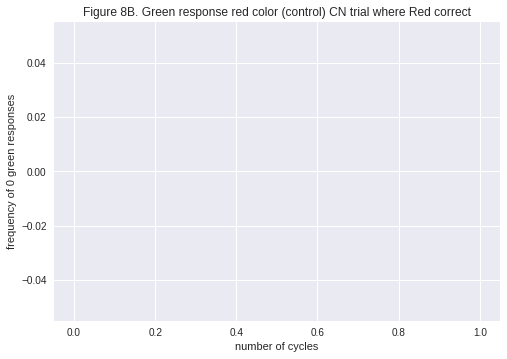

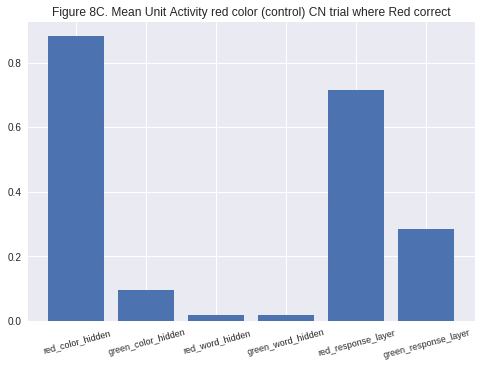

In [ ]:
#test CN control trial
trial_test_counter = trial_test_counter + 1
ntrials = 100
CN_control_trial_title = 'red color (control) CN trial where Red correct'
CN_control_trial_input = trial_dict(1, 0, 0, 0, 1, 0) #red_color, green color, red_word, green word, CN, WR
results_CN_control_trial = testtrialtype(CN_control_trial_input, 
                                         CN_trial_initialize_input, 
                                         ntrials, 
                                         CN_control_trial_title,
                                         trial_test_counter)

#test CN congruent trial (should have more cycles than WR congruent)
trial_test_counter = trial_test_counter + 1
ntrials = 100
CN_congruent_trial_title = 'congruent CN trial where Red correct'
CN_congruent_trial_input = trial_dict(1, 0, 1, 0, 1, 0) #red_color, green color, red_word, green word, CN, WR
results_CN_congruent_trial = testtrialtype(CN_congruent_trial_input, 
                                           CN_trial_initialize_input, 
                                           ntrials, 
                                           CN_congruent_trial_title,
                                           trial_test_counter)

#test CN incongruent trial, should see that word interferes with color (should have most cycles + more than CN control)
trial_test_counter = trial_test_counter + 1
ntrials = 100
CN_incongruent_trial_title = 'incongruent CN trial where Red correct'
CN_incongruent_trial_input = trial_dict(1, 0, 0, 1, 1, 0) #red_color, green color, red_word, green word, CN, WR
results_CN_incongruent_trial = testtrialtype(CN_incongruent_trial_input, 
                                             CN_trial_initialize_input, 
                                             ntrials, 
                                             CN_incongruent_trial_title,
                                             trial_test_counter)


---
### Lab Exercise
Explain what each of the figures is depicting, including what it corresponds to in the model and how you would map this to a psychological process or behavioral performance.

---

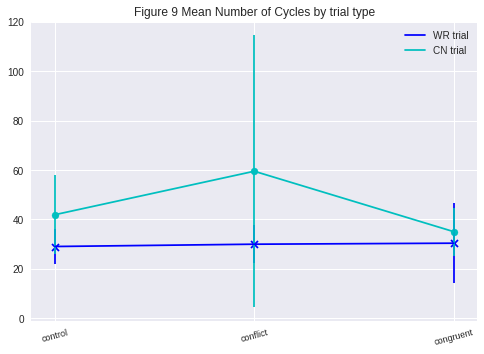

In [ ]:
#plot average reaction time and compare for each type of stimulus 
trial_test_counter = trial_test_counter + 1
cycles_mean = [np.mean(results_WR_control_trial[0]),
     np.mean(results_WR_incongruent_trial[0]),
     np.mean(results_WR_congruent_trial[0]),
     np.mean(results_CN_control_trial[0]),
     np.mean(results_CN_incongruent_trial[0]),
     np.mean(results_CN_congruent_trial[0])]
cycles_std = [np.std(results_WR_control_trial[0]),
         np.std(results_WR_incongruent_trial[0]),
         np.std(results_WR_congruent_trial[0]),
         np.std(results_CN_control_trial[0]),
         np.std(results_CN_incongruent_trial[0]),
         np.std(results_CN_congruent_trial[0])]
cycles_x = np.array([0, 1, 2, 0, 1, 2])
labs = ['control',
        'conflict',
        'congruent']
legend = ['WR trial',
          'CN trial']
colors = ['b', 'c']

plt.plot(cycles_x[0:3], cycles_mean[0:3], color=colors[0])
plt.errorbar(cycles_x[0:3], cycles_mean[0:3], xerr=0, yerr=cycles_std[0:3], ecolor=colors[0], fmt='none')
plt.scatter(cycles_x[0], cycles_mean[0], marker='x', color=colors[0])
plt.scatter(cycles_x[1], cycles_mean[1], marker='x', color=colors[0])
plt.scatter(cycles_x[2], cycles_mean[2], marker='x', color=colors[0])
plt.plot(cycles_x[3:6], cycles_mean[3:6], color=colors[1])
plt.errorbar(cycles_x[3:6], cycles_mean[3:6], xerr=0, yerr=cycles_std[3:6], ecolor=colors[1], fmt='none')
plt.scatter(cycles_x[3], cycles_mean[3], marker='o', color=colors[1])
plt.scatter(cycles_x[4], cycles_mean[4], marker='o', color=colors[1])
plt.scatter(cycles_x[5], cycles_mean[5], marker='o', color=colors[1])

plt.xticks(cycles_x, labs, rotation=15)
plt.tick_params(axis='x', labelsize=9)
plt.title('Figure '+str(trial_test_counter)+' Mean Number of Cycles by trial type')
plt.legend(legend)
plt.show()

---
## Lab Exercise: Training Alternative Experience
Recreate the Stroop Model and provide it with training that is more similar to a child who is just beginning to learn how to read.  For this purpose, assume the child has 9x as much experience naming colors as reading words of colors.  

---

In [ ]:
# SET UP MECHANISMS
#  INPUT UNITS

#  colors: ('red', 'green'), words: ('RED','GREEN')
colors_input_layer_learn = pnl.TransferMechanism(size=2,
                                           function=pnl.Linear,
                                           name='COLORS_INPUT')

words_input_layer_learn = pnl.TransferMechanism(size=2,
                                          function=pnl.Linear,
                                          name='WORDS_INPUT')

#   Task layer, tasks: ('name the color', 'read the word')
task_layer_learn = pnl.TransferMechanism(size=2,
                                   function=pnl.Linear,
                                   name='TASK')

#   HIDDEN LAYER UNITS

#   colors_hidden: ('red','green')
#   Logistic activation function, Gain = 1.0, Bias = -4.0 (in PNL bias is subtracted so enter +4.0 to get negative bias)
colors_hidden_layer_learn = pnl.TransferMechanism(size=2,
                                            function=pnl.Logistic(gain=1.0, bias=4.0),
                                            name='COLORS HIDDEN')
#    words_hidden: ('RED','GREEN')
words_hidden_layer_learn = pnl.TransferMechanism(size=2,
                                           function=pnl.Logistic(gain=1.0, bias=4.0),
                                           name='WORDS HIDDEN')

#    OUTPUT UNITS

#   Response layer, responses: ('red', 'green')
response_layer_learn = pnl.TransferMechanism(size=2,
                                       function=pnl.Logistic,
                                       name='RESPONSE')

In [ ]:
#   LOGGING
colors_hidden_layer_learn.set_log_conditions('value')
words_hidden_layer_learn.set_log_conditions('value')
response_layer_learn.set_log_conditions('value')

In [ ]:
#   SET UP CONNECTIONS

#   rows correspond to sender
#   columns correspond to: weighting of the contribution that a given sender makes to the receiver

#   INPUT TO HIDDEN
# row 0: input_'red' to hidden_'red', hidden_'green'
# row 1: input_'green' to hidden_'red', hidden_'green'
color_weights_learn = pnl.MappingProjection(matrix=np.matrix([[2, -2],
                                                        [-2, 2]]),
                                      name='COLOR_WEIGHTS')
# row 0: input_'RED' to hidden_'RED', hidden_'GREEN'
# row 1: input_'GREEN' to hidden_'RED', hidden_'GREEN'
word_weights_learn = pnl.MappingProjection(matrix=np.matrix([[2, -2],
                                                       [-2, 2]]),
                                     name='WORD_WEIGHTS')

#   HIDDEN TO RESPONSE
# row 0: hidden_'red' to response_'red', response_'green'
# row 1: hidden_'green' to response_'red', response_'green'
# want small random values (i.e. between -0.1 and 0.1)
color_weight_matrix_learn = np.matrix([[random.gauss(0.0, 0.1),
            random.gauss(0.0, 0.1)],
           [random.gauss(0.0, 0.1),
            random.gauss(0.0, 0.1)]])
# row 0: hidden_'RED' to response_'red', response_'green'
# row 1: hidden_'GREEN' to response_'red', response_'green'
word_weight_matrix_learn = np.matrix([[random.gauss(0.0, 0.1),
            random.gauss(0.0, 0.1)],
           [random.gauss(0.0, 0.1),
            random.gauss(0.0, 0.1)]])

color_response_weights_learn = pnl.MappingProjection(sender=colors_hidden_layer_learn,
                                               receiver=response_layer_learn,
                                               matrix=color_weight_matrix_learn,
                                               name='COLOR_RESPONSE_WEIGHTS')

word_response_weights_learn = pnl.MappingProjection(sender=words_hidden_layer_learn,
                                              receiver=response_layer_learn,
                                              matrix=word_weight_matrix_learn,
                                              name='WORD_RESPONSE_WEIGHTS')

#   TASK TO HIDDEN LAYER
#   weights and bias of hidden units set so that when the task is activated
#   the hidden units have value 0.0 and are thus maximally responsive
#   row 0: task_CN to hidden_'red', hidden_'green'
#   row 1: task_WR to hidden_'red', hidden_'green'
task_CN_weights_learn = pnl.MappingProjection(matrix=np.matrix([[4.0, 4.0],
                                                          [0, 0]]),
                                        name='TASK_CN_WEIGHTS')

#   row 0: task_CN to hidden_'RED', hidden_'GREEN'
#   row 1: task_WR to hidden_'RED', hidden_'GREEN'
task_WR_weights_learn = pnl.MappingProjection(matrix=np.matrix([[0, 0],
                                                          [4.0, 4.0]]),
                                        name='TASK_WR_WEIGHTS')

In [ ]:
#   CREATE PATHWAYS
#   Words pathway
words_input_to_hidden_process_learn = pnl.Process(pathway=[words_input_layer_learn,
                                     word_weights_learn,
                                     words_hidden_layer_learn],
                            name='WORDS_INPUT_TO_HIDDEN_PROCESS')

words_hidden_to_response_process_learn = pnl.Process(pathway=[
                                     words_hidden_layer_learn,
                                     word_response_weights_learn,
                                     response_layer_learn],
                            learning=pnl.LEARNING,
                            name='WORDS_HIDDEN_TO_RESPONSE_PROCESS')

#   Colors pathway
colors_input_to_hidden_process_learn = pnl.Process(pathway=[colors_input_layer_learn,
                                      color_weights_learn,
                                      colors_hidden_layer_learn],
                             name='COLORS_PROCESS')
#   just learning weights from hidden to response
#   **flag: what is psychology behind this? ************************************
#   paper says: early in experience easy to perceieve colors/words
#   but harder to map these to verbal responses
colors_hidden_to_response_process_learn = pnl.Process(pathway=[
                                      colors_hidden_layer_learn,
                                      color_response_weights_learn,
                                      response_layer_learn],
                             learning=pnl.LEARNING,
                             name='COLORS_PROCESS')

#   Task representation pathway
task_CN_process_learn = pnl.Process(pathway=[task_layer_learn,
                                       task_CN_weights_learn,
                                       colors_hidden_layer_learn],
                              name='TASK_CN_PROCESS')
task_WR_process_learn = pnl.Process(pathway=[task_layer_learn,
                                       task_WR_weights_learn,
                                       words_hidden_layer_learn],
                              name='TASK_WR_PROCESS')

In [ ]:
#   CREATE SYSTEM
my_Stroop_learn = pnl.System(processes=[words_input_to_hidden_process_learn,
                                  words_hidden_to_response_process_learn,
                                  colors_input_to_hidden_process_learn,
                                  colors_hidden_to_response_process_learn,
                                  task_CN_process_learn,
                                  task_WR_process_learn],
                       name='LEARNING_FEEDFORWARD_STROOP_SYSTEM')

In [ ]:
my_Stroop_learn.show()
my_Stroop_learn.show_graph(show_dimensions=pnl.ALL, output_fmt = 'jupyter')
my_Stroop_learn.show_graph(show_mechanism_structure=pnl.VALUES, output_fmt = 'jupyter')


---------------------------------------------------------

LEARNING_FEEDFORWARD_STROOP_SYSTEM

	Control enabled: False

	Processes:
		WORDS_INPUT_TO_HIDDEN_PROCESS [learning enabled: False]
		WORDS_HIDDEN_TO_RESPONSE_PROCESS [learning enabled: True]
		COLORS_PROCESS-1 [learning enabled: False]
		COLORS_PROCESS-2 [learning enabled: True]
		TASK_CN_PROCESS-1 [learning enabled: False]
		TASK_WR_PROCESS-1 [learning enabled: False]

	Execution sets: 
		Set 0:
			{ COLORS_INPUT-1 TASK-1 WORDS_INPUT-1 }
		Set 1:
			{ COLORS HIDDEN-1 WORDS HIDDEN-1 }
		Set 2:
			{ RESPONSE-1 }


ModuleNotFoundError: ignored

In [ ]:
#Function to create training trials
# a RED word input is [1,0] to words_input_layer and GREEN word is [0,1]
# a red color input is [1,0] to colors_input_layer and green color is [0,1]
# a color-naming trial is [1,0] to task_layer and a word-reading trial is [0,1]
def trial_dict_learn(red_color, green_color, red_word, green_word, CN, WR):
    if red_color or red_word:
        targetdict = {response_layer_learn: [1, 0]}
    elif green_color or green_word:
        targetdict = {response_layer_learn: [0, 1]}
    trialdict = {
    colors_input_layer_learn: [red_color, green_color],
    words_input_layer_learn: [red_word, green_word],
    task_layer_learn: [CN, WR]
    }
    return trialdict, targetdict

In [ ]:
# function to run training trials
def traintrialtype(trial_seq):
    # create variable to store results
    results = np.empty((11, 0))
    #mapping from sequence to trial types
    #NOTE: if you want to change the number of test trials from 100 you have to adjust the inds variables below: 
    red_word_inds=np.arange(0,40,1)
    green_word_inds=np.arange(40,80,1)
    red_color_inds=np.arange(80,90,1)
    green_color_inds=np.arange(90,100,1)

    for num in trial_seq:
        # create inputs, targets according to trial_seq 
        if np.isin(num,red_word_inds):
            # red word trial
            red_color, green_color, red_word, green_word, CN, WR = 0, 0, 1, 0, 0, 1
        elif np.isin(num,green_word_inds):
            # green word trial 
            red_color, green_color, red_word, green_word, CN, WR = 0, 0, 0, 1, 0, 1
        elif np.isin(num, red_color_inds):
            # red color trial
            red_color, green_color, red_word, green_word, CN, WR = 1, 0, 0, 0, 1, 0
        else:
            # green color trial
            red_color, green_color, red_word, green_word, CN, WR = 0, 1, 0, 0, 1, 0
            
        tmpinputs, tmptargets = trial_dict_learn(red_color, green_color, red_word, green_word, CN, WR)

        # run system with training pattern
        my_Stroop_learn.run(inputs=tmpinputs, targets=tmptargets)

        # store results
        my_response_layer_results = response_layer_learn.log.nparray_dictionary()
        abs_timesteps = np.asarray(np.size(my_response_layer_results['value'])).reshape(1, 1)
        response_layer_value = np.asarray(response_layer_learn.value).reshape(2, 1)
        # row 0: hidden_'red' to response_'red', response_'green'
        # row 1: hidden_'green' to response_'red', response_'green'
        hidden_red_to_response_mod_weights = np.asarray(color_response_weights_learn.mod_matrix[0]).reshape(2, 1)
        hidden_green_to_response_mod_weights = np.asarray(color_response_weights_learn.mod_matrix[1]).reshape(2, 1)

        # row 0: hidden_'RED' to response_'red', response_'green'
        # row 1: hidden_'GREEN' to response_'red', response_'green'
        hidden_RED_to_response_mod_weights = np.asarray(word_response_weights_learn.mod_matrix[0]).reshape(2, 1)
        hidden_GREEN_to_response_mod_weights = np.asarray(word_response_weights_learn.mod_matrix[1]).reshape(2, 1)

        tmp_results = np.concatenate((abs_timesteps,
                                     response_layer_value,
                                     hidden_red_to_response_mod_weights,
                                     hidden_green_to_response_mod_weights,
                                     hidden_RED_to_response_mod_weights,
                                     hidden_GREEN_to_response_mod_weights),
                                     axis=0)
        results = np.append(results, tmp_results, axis=1)

    #plot red response unit activity over time (absolute time step)
    plt.plot(results[0], results[1])
    plt.xlabel("training trial number")
    plt.ylabel("Red response unit activity")
    plt.title('Learning Figure 1. Red response unit activity')
    plt.show()
    #plot green response unit activity over time (absolute time step)
    plt.plot(results[0], results[2])
    plt.xlabel("training trial number")
    plt.ylabel("Green response unit activity")
    plt.title('Learning Figure 2. Green response unit activity')
    plt.show()
    #plot red_color_hidden to red_response weight over time (absolute time step)
    plt.plot(results[0], results[3])
    plt.xlabel("training trial number")
    plt.ylabel("red_color_hidden to red_response weight")
    plt.title('Learning Figure 3. red_color_hidden to red_response weight')
    plt.show()
    #plot red_color_hidden to green_response weight over time (absolute time step)
    plt.plot(results[0], results[4])
    plt.xlabel("training trial number")
    plt.ylabel("red_color_hidden to green_response weight")
    plt.title('Learning Figure 4. red_color_hidden to green_response weight')
    plt.show()
    #plot RED_word_hidden to red_response weight over time (absolute time step)
    plt.plot(results[0], results[7])
    plt.xlabel("training trial number")
    plt.ylabel("RED_word_hidden to red_response weight")
    plt.title('Learning Figure 5. RED_word_hidden to red_response weight')
    plt.show()
    #plot GREEN_word_hidden to green_response weight over time (absolute time step)
    plt.plot(results[0], results[8])
    plt.xlabel("training trial number")
    plt.ylabel("GREEN_word_hidden to red_response weight")
    plt.title('Learning Figure 6. GREEN_word_hidden to red_response weight')
    plt.show()


    return results

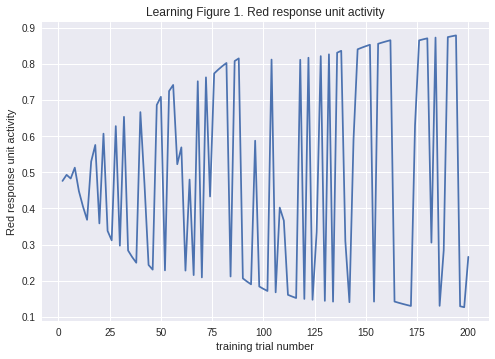

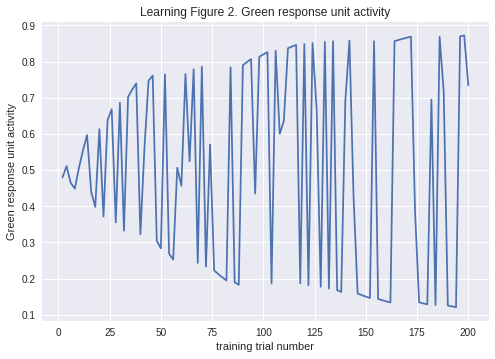

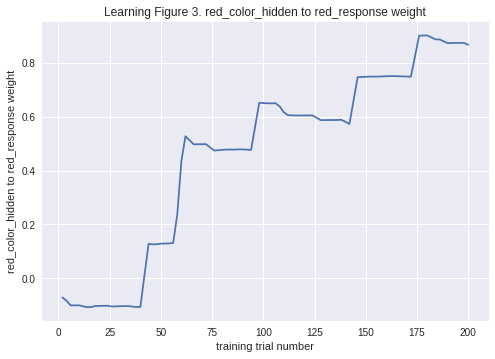

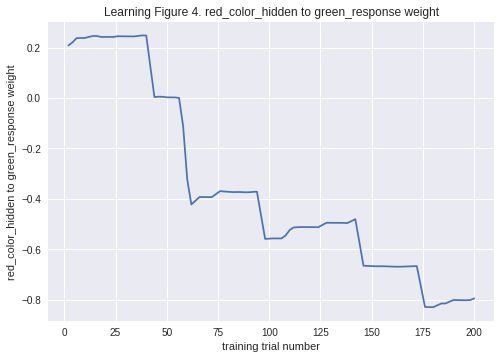

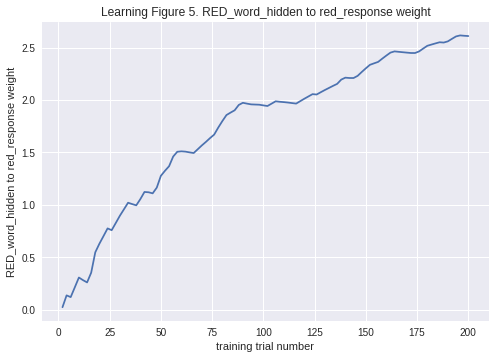

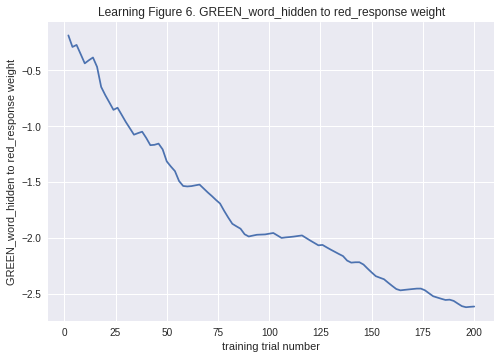

In [ ]:
#make a sequence of training trials 
ntrials = 100
trial_seq=np.random.randint(0,ntrials,(ntrials))

#execute training 
training_results = traintrialtype(trial_seq)

trial is 0
trial is 1
trial is 2
trial is 3
trial is 4
trial is 5
trial is 6
trial is 7
trial is 8
trial is 9
trial is 10
trial is 11
trial is 12
trial is 13
trial is 14
trial is 15
trial is 16
trial is 17
trial is 18
trial is 19
trial is 0
trial is 1
trial is 2
trial is 3
trial is 4
trial is 5
trial is 6
trial is 7
trial is 8
trial is 9
trial is 10
trial is 11
trial is 12
trial is 13
trial is 14
trial is 15
trial is 16
trial is 17
trial is 18
trial is 19
trial is 0
trial is 1
trial is 2
trial is 3
trial is 4
trial is 5
trial is 6
trial is 7
trial is 8
trial is 9
trial is 10
trial is 11
trial is 12
trial is 13
trial is 14
trial is 15
trial is 16
trial is 17
trial is 18
trial is 19
trial is 0
trial is 1
trial is 2
trial is 3
trial is 4
trial is 5
trial is 6
trial is 7
trial is 8
trial is 9
trial is 10
trial is 11
trial is 12
trial is 13
trial is 14
trial is 15
trial is 16
trial is 17
trial is 18
trial is 19
trial is 0
trial is 1
trial is 2
trial is 3
trial is 4
trial is 5
trial is 6
tri

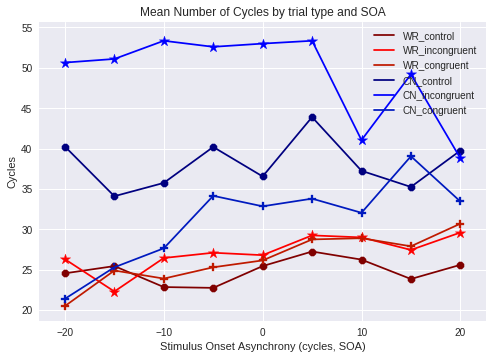

In [ ]:
###### ALL CODE FOR RACE HORSE ########
# NOTE: This code relies on while loops, although it almost always runs through fine, if the print output 'trial is __' is stopped for a long time, break the code and run it again
#   CELL 1: CREATE THRESHOLD FUNCTION
def pass_threshold(mech1, mech2, thresh, isSOA, SOA):

    # how many times has system already been executed for this run?    
    log_time_steps = respond_red_accumulator.log.nparray_dictionary()
    if 'value' in log_time_steps: #on a first run the log will be empty and won't have attribute 'value'
      time_steps = np.size(log_time_steps['value'])
    else:
      time_steps = 0
    # if this is part of the stimulus asynchrony component then stop after abs(SOA) trials
    if isSOA == 1 and time_steps >= abs(SOA):
      return True
    
    # if this is part of the asymptote trial then stop after 1 execution
    if isSOA == -1 and time_steps > 0:
      return True
    
    # if this is the main trial then stop when one of the accumulators passes threshold 1
    results1 = mech1.output_states[0].value
    results2 = mech2.output_states[0].value
    for val in results1:
        if val >= thresh:
            return True
    for val in results2:
        if val >= thresh:
            return True
    return False

# set threshold for accumulator 
accumulator_threshold = 1.0
# initialize variable isSOA (tells us if we are in the stimulus asynchrony part of trial)
isSOA = 0
# initialize variables SOA (tells us how long we are in the stimulus asynchrony part of trial)
SOA = 0

terminate_trial = {
    pnl.TimeScale.TRIAL: pnl.While(pass_threshold, respond_red_accumulator, respond_green_accumulator, accumulator_threshold, isSOA, SOA)
}



#####CELL 2: function to test a particular trial type 
def testtrialtype(red_color, green_color, red_word, green_word, CN, WR, SOA, ntrials):
    #create variable to store results 
    tmp_results = np.empty((3,0))
    results = np.empty((3,0))
    # make color only and word only components of trial 
    color_only_trial_input = trial_dict(red_color, green_color, 0, 0, CN, WR)
    word_only_trial_input = trial_dict(0, 0, red_word, green_word, CN, WR)
    full_trial_input = trial_dict(red_color, green_color, red_word, green_word, CN, WR)
    #clear log
    respond_red_accumulator.log.clear_entries(delete_entry=False)
    respond_red_accumulator.reinitialize(0)
    respond_green_accumulator.reinitialize(0)
    for trial in range(ntrials):
        print('trial is '+str(trial))
        #clear log to get num_timesteps for next run
        respond_red_accumulator.log.clear_entries(delete_entry=False)
        
        #run system once (with integrator mode off and no noise for hidden units) with only task so asymptotes 
        colors_hidden_layer.integrator_mode = False 
        words_hidden_layer.integrator_mode = False 
        response_layer.integrator_mode = False 
        colors_hidden_layer.noise = 0 
        words_hidden_layer.noise = 0 
        response_layer.noise = 0 
        isSOA = -1 
        terminate_trial = {
            pnl.TimeScale.TRIAL: pnl.While(pass_threshold, 
                                           respond_red_accumulator, 
                                           respond_green_accumulator, 
                                           accumulator_threshold, 
                                           isSOA, SOA) 
        }
        if WR == 1:
          my_Stroop.run(inputs=WR_trial_initialize_input, termination_processing=terminate_trial)
        elif CN == 1:
          my_Stroop.run(inputs=CN_trial_initialize_input, termination_processing=terminate_trial)
          
        #but didn't want to run accumulators so set those back to zero 
        respond_green_accumulator.reinitialize(0)
        respond_red_accumulator.reinitialize(0)
        
        # now put back in integrator mode and noise 
        colors_hidden_layer.integrator_mode = True 
        words_hidden_layer.integrator_mode = True 
        response_layer.integrator_mode = True
        colors_hidden_layer.noise = pnl.NormalDist(mean=0, standard_dev=unit_noise).function
        words_hidden_layer.noise = pnl.NormalDist(mean=0, standard_dev=unit_noise).function
        response_layer.noise = pnl.NormalDist(mean=0, standard_dev=unit_noise).function

        # now give the system N cycles of just the color according to the SOA 
        # accomplish by manipulating the termination condition
        # then run system with test pattern
        if WR == 1 and SOA < 0: # then present color first
          isSOA = 1
          terminate_trial = {
              pnl.TimeScale.TRIAL: pnl.While(pass_threshold, 
                                             respond_red_accumulator, 
                                             respond_green_accumulator, 
                                             accumulator_threshold, 
                                             isSOA, SOA) 
          }
          my_Stroop.run(inputs=color_only_trial_input, termination_processing=terminate_trial)
          # now run until accumulators hit threshold
          isSOA = 0
          terminate_trial = {
              pnl.TimeScale.TRIAL: pnl.While(pass_threshold, 
                                             respond_red_accumulator, 
                                             respond_green_accumulator, 
                                             accumulator_threshold, 
                                             isSOA, SOA)
          }
          #start reaction time once full stimulus comes on 
          respond_red_accumulator.log.clear_entries(delete_entry=False)
          my_Stroop.run(inputs=full_trial_input, termination_processing=terminate_trial)
        elif CN == 1 and SOA < 0: # then present word first
          isSOA = 1
          terminate_trial = {
              pnl.TimeScale.TRIAL: pnl.While(pass_threshold, 
                                             respond_red_accumulator, 
                                             respond_green_accumulator, 
                                             accumulator_threshold, 
                                             isSOA, SOA) 
          }
          my_Stroop.run(inputs=word_only_trial_input, termination_processing=terminate_trial)
          
          isSOA = 0
          terminate_trial = {
              pnl.TimeScale.TRIAL: pnl.While(pass_threshold, 
                                             respond_red_accumulator, 
                                             respond_green_accumulator, 
                                             accumulator_threshold, 
                                             isSOA, SOA) 
          }
          #start reaction time once full stimulus comes on 
          respond_red_accumulator.log.clear_entries(delete_entry=False)
          
          my_Stroop.run(inputs=full_trial_input, termination_processing=terminate_trial)
        elif WR == 1 and SOA > 0: # then present word first and color after
          #don't include asymptote cycle
          respond_red_accumulator.log.clear_entries(delete_entry=False)
          
          isSOA = 1
          terminate_trial = {
              pnl.TimeScale.TRIAL: pnl.While(pass_threshold, 
                                             respond_red_accumulator, 
                                             respond_green_accumulator, 
                                             accumulator_threshold, 
                                             isSOA, SOA) 
          }
          #start reaction time once relevant stimulus comes on 
          my_Stroop.run(inputs=word_only_trial_input, termination_processing=terminate_trial)
          isSOA = 0
          terminate_trial = {
              pnl.TimeScale.TRIAL: pnl.While(pass_threshold, 
                                             respond_red_accumulator, 
                                             respond_green_accumulator, 
                                             accumulator_threshold, 
                                             isSOA, SOA)
          }
          my_Stroop.run(inputs=full_trial_input, termination_processing=terminate_trial)
        elif CN == 1 and SOA > 0: # then present color first word after
          #don't include asymptote cycle
          respond_red_accumulator.log.clear_entries(delete_entry=False)
          isSOA = 1
          terminate_trial = {
              pnl.TimeScale.TRIAL: pnl.While(pass_threshold, 
                                             respond_red_accumulator, 
                                             respond_green_accumulator, 
                                             accumulator_threshold, 
                                             isSOA, SOA)
          }
          #start reaction time once relevant stimulus comes on 
          my_Stroop.run(inputs=color_only_trial_input, termination_processing=terminate_trial)
          isSOA = 0
          terminate_trial = {
              pnl.TimeScale.TRIAL: pnl.While(pass_threshold, 
                                             respond_red_accumulator, 
                                             respond_green_accumulator, 
                                             accumulator_threshold, 
                                             isSOA, SOA)
          }
          my_Stroop.run(inputs=full_trial_input, termination_processing=terminate_trial)
        else: # this is the case where SOA is zero 
          #don't include asymptote cycle
          respond_red_accumulator.log.clear_entries(delete_entry=False)
          isSOA = 0
          terminate_trial = {
              pnl.TimeScale.TRIAL: pnl.While(pass_threshold, 
                                             respond_red_accumulator, 
                                             respond_green_accumulator, 
                                             accumulator_threshold, 
                                             isSOA, SOA)
          }
          my_Stroop.run(inputs=full_trial_input, termination_processing=terminate_trial)

        # store results
        my_red_accumulator_results = respond_red_accumulator.log.nparray_dictionary()
        # how many cycles to run? count the length of the log
        if 'value' in my_red_accumulator_results:
          #shouldn't happen but possible the full_trial_input run doesn't run because accumulator threshold already hit by color/word_only run
          #in this case don't want an error so set all values to zero  
          num_timesteps = np.asarray(np.size(my_red_accumulator_results['value'])).reshape(1,1)
          # value of parts of the system
          red_activity = np.asarray(respond_red_accumulator.value).reshape(1,1)
          green_activity = np.asarray(respond_green_accumulator.value).reshape(1,1)
          #which response hit threshold first?
          if red_activity > green_activity:
              respond_red = np.array([1]).reshape(1,1)
          else:
              respond_red = np.array([0]).reshape(1,1)
        else:
          num_timesteps = 0
          respond_red = -1 
          # value of parts of the system should still work, but comes from color/word only trial run
          red_activity = np.asarray(respond_red_accumulator.value).reshape(1,1)
          green_activity = np.asarray(respond_green_accumulator.value).reshape(1,1)
            
        tmp_all_results = np.concatenate((np.asarray(SOA).reshape(1,1),
                                      num_timesteps,
                                      respond_red), axis=0)
        tmp_results = np.append(tmp_results, tmp_all_results, axis=1)
        
        # after a run we want to reset the activations of the integrating units so we can test many trials and examine the distrubtion of responses 
        words_hidden_layer.reinitialize([0,0])
        colors_hidden_layer.reinitialize([0,0])
        response_layer.reinitialize([0,0])
        #clear log to get num_timesteps for next run
        respond_red_accumulator.log.clear_entries(delete_entry=False)
        
    # take average number of cycles for correct trials for this SOA 
    #results = np.asarray(np.mean(tmp_results[0:2,(tmp_results[2]==1)], axis=1)).reshape(2,1)
    results = np.asarray(np.mean(tmp_results[0:2], axis=1)).reshape(2,1)
    return results

  
  
###### CELL 3:
# test range of SOA on incongruent WR trial to see if colors can interfere with words if presented before words 
SOA_set = [-20, -15, -10, -5, 0, 5, 10, 15, 20]

# how many tests of each trial type / SOA combination
ntrials = 20

SOA_results = np.empty((12,0))

for SOA in SOA_set: 
  # control WR trial 
  red_color, green_color, red_word, green_word, CN, WR = 0, 0, 1, 0, 0, 1
  #red_color, green_color, red_word, green_word, CN, WR, SOA, ntrials
  results_WR_control_SOA_trial = testtrialtype(red_color,
                                               green_color,
                                               red_word,
                                               green_word,
                                               CN,
                                               WR,
                                               SOA,
                                               ntrials)

  # incongruent WR trial 
  red_color, green_color, red_word, green_word, CN, WR = 0, 1, 1, 0, 0, 1
  #red_color, green_color, red_word, green_word, CN, WR, SOA, ntrials
  results_WR_incongruent_SOA_trial = testtrialtype(red_color, 
                                                   green_color, 
                                                   red_word, 
                                                   green_word, 
                                                   CN, 
                                                   WR,
                                                   SOA,
                                                   ntrials)
  # congruent WR trial 
  red_color, green_color, red_word, green_word, CN, WR = 1, 0, 1, 0, 0, 1
  #red_color, green_color, red_word, green_word, CN, WR, SOA, ntrials
  results_WR_congruent_SOA_trial = testtrialtype(red_color, 
                                                   green_color, 
                                                   red_word, 
                                                   green_word, 
                                                   CN, 
                                                   WR,
                                                   SOA,
                                                   ntrials)
  # control CN trial 
  red_color, green_color, red_word, green_word, CN, WR = 1, 0, 0, 0, 1, 0
  #red_color, green_color, red_word, green_word, CN, WR, SOA, ntrials
  results_CN_control_SOA_trial = testtrialtype(red_color,
                                               green_color,
                                               red_word,
                                               green_word,
                                               CN,
                                               WR,
                                               SOA,
                                               ntrials)

  # incongruent CN trial 
  red_color, green_color, red_word, green_word, CN, WR = 1, 0, 0, 1, 1, 0
  #red_color, green_color, red_word, green_word, CN, WR, SOA, ntrials
  results_CN_incongruent_SOA_trial = testtrialtype(red_color, 
                                                   green_color, 
                                                   red_word, 
                                                   green_word, 
                                                   CN, 
                                                   WR,
                                                   SOA,
                                                   ntrials)
  # congruent CN trial 
  red_color, green_color, red_word, green_word, CN, WR = 1, 0, 1, 0, 1, 0
  #red_color, green_color, red_word, green_word, CN, WR, SOA, ntrials
  results_CN_congruent_SOA_trial = testtrialtype(red_color, 
                                                   green_color, 
                                                   red_word, 
                                                   green_word, 
                                                   CN, 
                                                   WR,
                                                   SOA,
                                                   ntrials)
  
  tmp_SOA_results = np.concatenate((results_WR_control_SOA_trial,
                                   results_WR_incongruent_SOA_trial,
                                   results_WR_congruent_SOA_trial,
                                   results_CN_control_SOA_trial,
                                   results_CN_incongruent_SOA_trial,
                                   results_CN_congruent_SOA_trial), axis=0)
  SOA_results = np.append(SOA_results,tmp_SOA_results, axis=1)
  
  
  
##### CELL 4:
print(SOA_results)
legend = ['WR_control',
         'WR_incongruent',
         'WR_congruent',
         'CN_control',
         'CN_incongruent',
         'CN_congruent']
colors = [(0.5, 0, 0),(1, 0, 0),(0.75, 0.1, 0),(0, 0, 0.5),(0, 0, 1),(0, 0.1, 0.75)]


plt.plot(SOA_results[0], SOA_results[1], color=colors[0])
plt.scatter(SOA_results[0], SOA_results[1], marker='8', s=60, color=colors[0])
plt.plot(SOA_results[0], SOA_results[3], color=colors[1])
plt.scatter(SOA_results[0], SOA_results[3], marker='*', s=120, color=colors[1])
plt.plot(SOA_results[0], SOA_results[5], color=colors[2])
plt.scatter(SOA_results[0], SOA_results[5], marker='P', s=60, color=colors[2])
plt.plot(SOA_results[0], SOA_results[7], color=colors[3])
plt.scatter(SOA_results[0], SOA_results[7], marker='8', s=60, color=colors[3])
plt.plot(SOA_results[0], SOA_results[9], color=colors[4])
plt.scatter(SOA_results[0], SOA_results[9], marker='*', s=120, color=colors[4])
plt.plot(SOA_results[0], SOA_results[11], color=colors[5])
plt.scatter(SOA_results[0], SOA_results[11], marker='P', s=60, color=colors[5])

plt.title('Mean Number of Cycles by trial type and SOA')
plt.legend(legend)
plt.xlabel('Stimulus Onset Asynchrony (cycles, SOA)')
plt.ylabel('Cycles')
plt.show()


# Homework

## 1. Build a Model of Flanker Task Performance
There are many tasks that involve interference, and a well-studied follow up to the Stroop task is called a Flanker task.  Flanker tasks require responding to a central stimulus with task-irrelevant stimuli surrounding the central stimulus.  For example, you could be asked to press respond to the central arrow on trials that contain congruent trials -> -> -> or <- <- <-,  along with incongruent trials -> <- -> or <- -> <-.  On average, most participants respond faster and more accurately on congruent trials compared to incongruent trials.  Assume these performance statistics.

Congruent RT = 400 ms
Incongruent RT = 430 ms

Congruent Accuracy = 99% (1% errors)
Incongruent Accuracy = 97% (3% errors)

Your assignment is to build a model that reproduces these performance metrics on the Flanker Arrow task, hard coding the weights. 

** change how much attention the system gives to the task, plot how performance varies with attention in the two tasks and comment on the relationship between CN and WR tasks as attention varies 

## 2. Build a Model of Flanker Task Performance with Learning
Now modify your model to learn the weights.  

